In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("DataAnalyst.csv")
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,TRUE
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2253.0,1126.000000,650.529400,0.0,563.0,1126.0,1689.0,2252.0
Rating,2253.0,3.160630,1.665228,-1.0,3.1,3.6,4.0,5.0
Founded,2253.0,1398.522858,901.929251,-1.0,-1.0,1979.0,2002.0,2019.0


In [4]:
df.drop(labels=['Unnamed: 0'], axis='columns', inplace=True)
print('Shape after removing: {}'.format(df.shape))

Shape after removing: (2253, 15)


/Users/sarthakdhaneshwar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


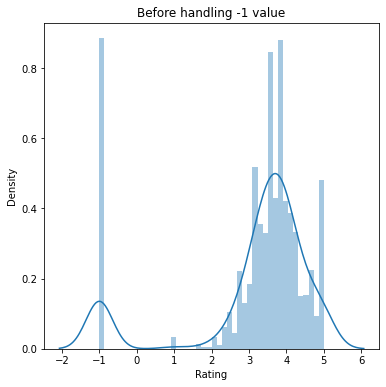

In [5]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Rating'])
p = plt.title('Before handling -1 value')

/Users/sarthakdhaneshwar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


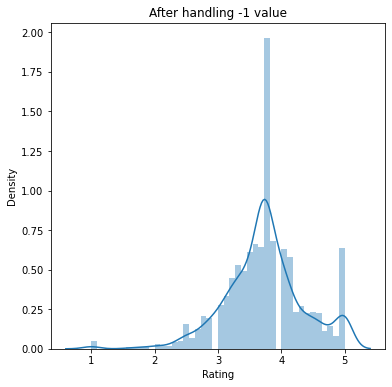

In [6]:
# Handling -1 values in Rating column
df['Rating'] = df['Rating'].apply(lambda x: np.NaN if x==-1 else x)
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Rating'])
p = plt.title('After handling -1 value')

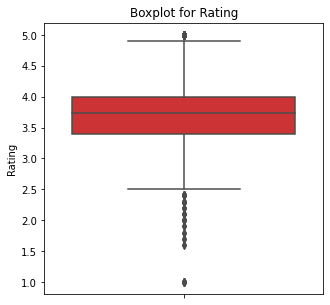

In [7]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Rating', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Rating')
p = plt.ylabel('Rating')

/Users/sarthakdhaneshwar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


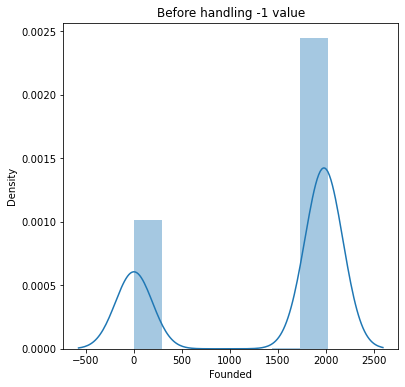

In [8]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Founded'])
p = plt.title('Before handling -1 value')

/Users/sarthakdhaneshwar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


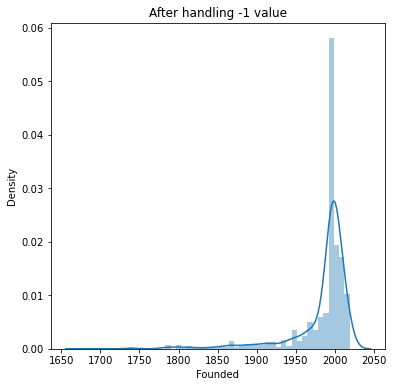

In [9]:
# Handling -1 values in Founded column
df['Founded'] = df['Founded'].apply(lambda x: np.NaN if x==-1 else x)
df['Founded'] = df['Founded'].fillna(int(df['Founded'].median()))
df['Founded'] = df['Founded'].astype('int')

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Founded'])
p = plt.title('After handling -1 value')

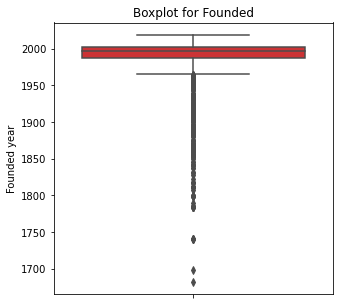

In [10]:
# Outliers in Founded
plt.figure(figsize=(5,5))
sns.boxplot(y='Founded', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Founded')
p = plt.ylabel('Founded year')

In [11]:
# Cleaning Job Title column
df['Job Title'].value_counts().nlargest(20)

Data Analyst               405
Senior Data Analyst         90
Junior Data Analyst         30
Business Data Analyst       28
Sr. Data Analyst            21
Data Quality Analyst        17
Data Analyst II             17
Data Analyst Junior         17
Data Governance Analyst     16
Lead Data Analyst           15
Data Reporting Analyst      13
Financial Data Analyst      12
Data Analyst III            11
Data Analyst I              11
Sr Data Analyst              9
Marketing Data Analyst       9
Data Warehouse Analyst       8
Data Management Analyst      8
Data Science Analyst         7
SQL Data Analyst             7
Name: Job Title, dtype: int64

In [12]:
def title_cleaner(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

df['job_title'] = df['Job Title'].apply(title_cleaner)
df['job_title'].value_counts()

data analyst      1658
other              551
data scientist      20
data engineer       17
manager              6
director             1
Name: job_title, dtype: int64

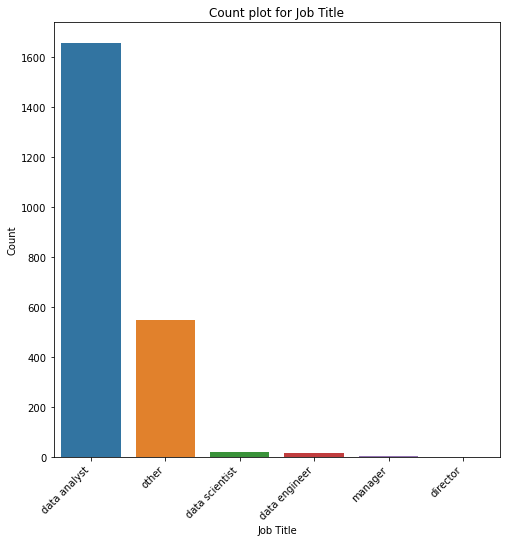

In [13]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_title', data=df, order = df['job_title'].value_counts().index)
p = plt.title('Count plot for Job Title')
p = plt.xlabel('Job Title')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [14]:
def title_seniority(title):
    if 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'sr'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'other'

df['job_seniority'] = df['Job Title'].apply(title_seniority)
df['job_seniority'].value_counts()

other    1741
sr        443
jr         69
Name: job_seniority, dtype: int64

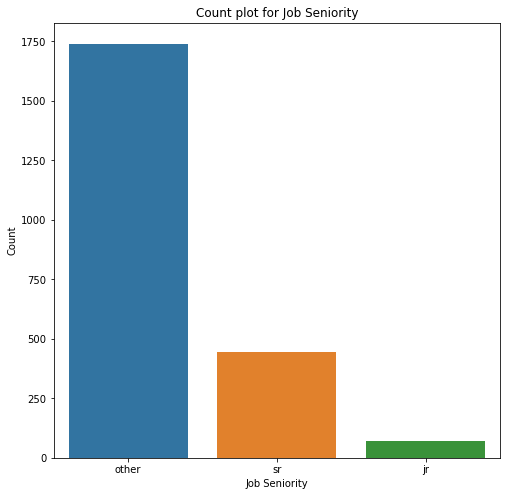

In [15]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_seniority', data=df, order = df['job_seniority'].value_counts().index)
p = plt.title('Count plot for Job Seniority')
p = plt.xlabel('Job Seniority')
p = plt.ylabel('Count')

In [16]:
# Removing Job Title column
df.drop(labels=['Job Title'], axis=1, inplace=True)# Cleaning Salary Estimate column
salary = df['Salary Estimate'].apply(lambda x: x.split("(")[0])
salary.value_counts()

$41K-$78K     57
$42K-$76K     57
$50K-$86K     41
$35K-$67K     33
$43K-$76K     31
              ..
$43K-$77K      3
$36K-$67K      3
$47K-$81K      3
$57K-$70K      2
-1             1
Name: Salary Estimate, Length: 90, dtype: int64

In [17]:
salary = salary.apply(lambda x: np.NaN if x=='-1' else x)
# Removing '$' and 'K' from 'Salary Estimate' column
salary = salary.apply(lambda x: x if type(x)== type(3.5) else x.replace('$','').replace('K',''))
salary

0        37-66 
1        37-66 
2        37-66 
3        37-66 
4        37-66 
         ...   
2248    78-104 
2249    78-104 
2250    78-104 
2251    78-104 
2252    78-104 
Name: Salary Estimate, Length: 2253, dtype: object

In [18]:
# Finding any inconsistencies in the salary
print("Length of Salary: ",len(salary.unique()))
salary.unique()[380:]

Length of Salary:  90


array([], dtype=object)

In [19]:
# Removing the string employer provided salary from salary array
salary = salary.apply(lambda x: x if type(x)==type(3.5) else x.lower().replace("employer provided salary:", ""))
salary.unique()[380:]

array([], dtype=object)

In [20]:
# Converting per hour salaries to per year salaries
def hourly_to_yearly(minlimit, maxlimit):
    x = minlimit.strip()
    y = maxlimit.strip()
    x = int(int(minlimit)*45*52/1000)
    y = int(int(maxlimit)*45*52/1000)
    return '{}-{}'.format(x,y)

salary = salary.apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))
salary.unique()[380:]

array([], dtype=object)

/Users/sarthakdhaneshwar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


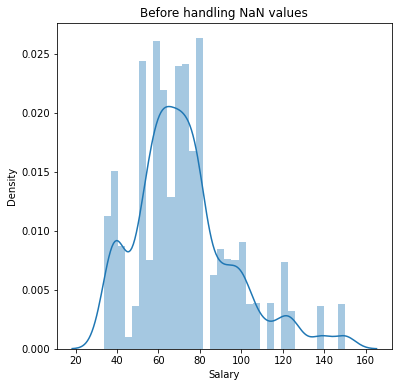

In [21]:
# Creating column for salary i.e. average of the range
df['Salary'] = salary.apply(lambda x:  x if type(x)==type(3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Salary'])
p = plt.title('Before handling NaN values')

/Users/sarthakdhaneshwar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


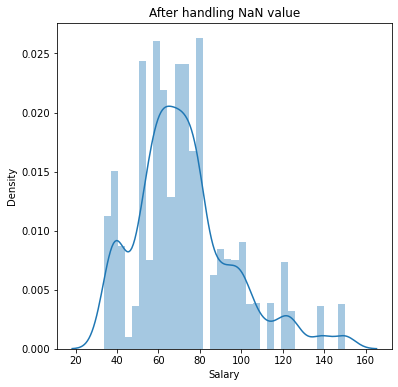

In [22]:
# Handling NaN values in Salary column
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Salary'])
p = plt.title('After handling NaN value')

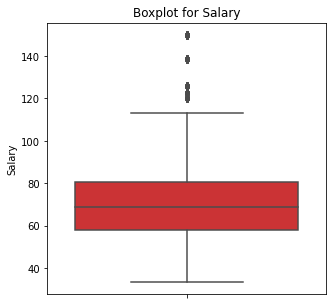

In [23]:
# Outliers in Salary
plt.figure(figsize=(5,5))
g = sns.boxplot(y='Salary', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Salary')
p = plt.ylabel('Salary')

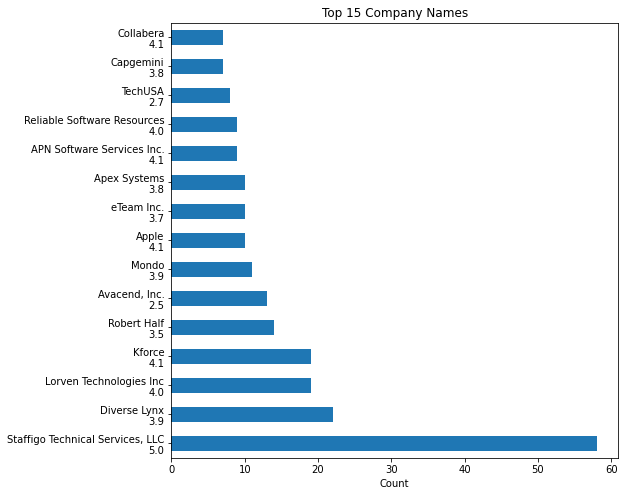

In [24]:
plt.figure(figsize=(8,8))
g = df["Company Name"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Company Names')
p = plt.xlabel('Count')

In [25]:
# Creating a column 'job_state'
df['job_location'] = df['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
print('Total number of unique locations: {}'.format(len(df['job_location'].unique())))

Total number of unique locations: 20


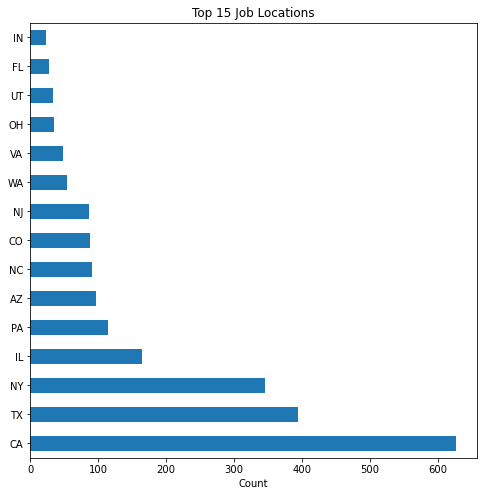

In [26]:
plt.figure(figsize=(8,8))
g = df["job_location"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Job Locations')
p = plt.xlabel('Count')

In [27]:
df['Size'].value_counts()

51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
-1                         163
5001 to 10000 employees     97
Unknown                     42
Name: Size, dtype: int64

In [28]:
# Cleaning 'Size' column
def size_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown'
  else:
    return text

df['Size'] = df['Size'].apply(size_simplifier)

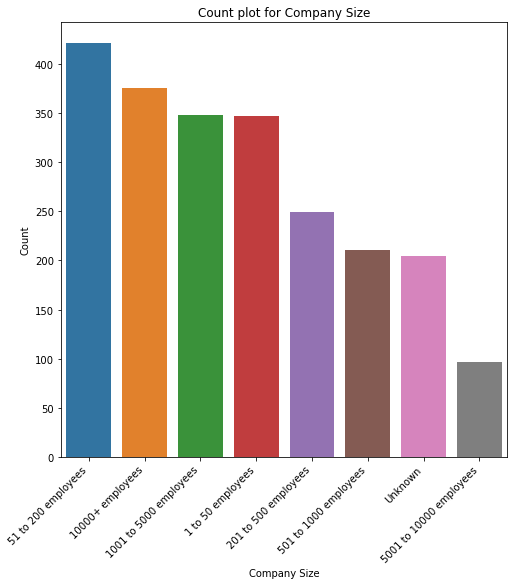

In [29]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Size', data=df, order = df['Size'].value_counts().index)
p = plt.title('Count plot for Company Size')
p = plt.xlabel('Company Size')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [30]:
# Cleaning 'Type of Ownership' column
df['Type of ownership'].value_counts()

Company - Private                 1273
Company - Public                   452
-1                                 163
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Unknown                             16
Other Organization                  13
Contract                            11
Private Practice / Firm              9
School / School District             9
Self-employed                        2
Franchise                            2
Name: Type of ownership, dtype: int64

In [31]:
def ownership_simplifier(text):
    if 'private' in text.lower():
        return 'Private'
    elif 'public' in text.lower():
        return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()) or ('school / school district' in text.lower()) or ('private practice / firm' in text.lower()) or ('contract' in text.lower()) :
        return 'Other Organization'
    else:
        return text

df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)

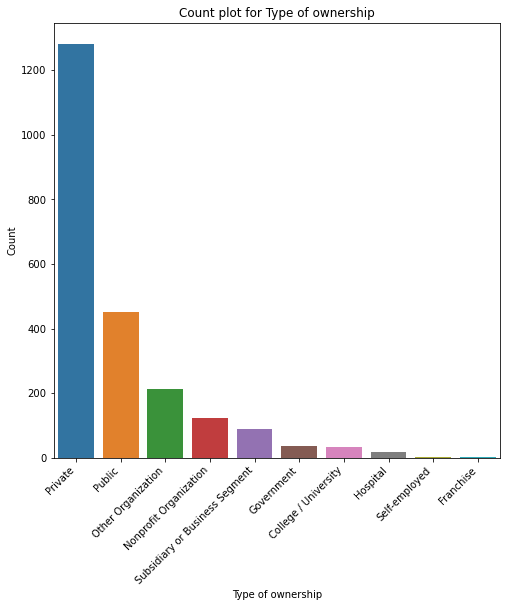

In [32]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Type of ownership', data=df, order = df['Type of ownership'].value_counts().index)
p = plt.title('Count plot for Type of ownership')
p = plt.xlabel('Type of ownership')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [33]:
# Cleaning 'Industry' column
df['Industry'].value_counts()

-1                                          353
IT Services                                 325
Staffing & Outsourcing                      323
Health Care Services & Hospitals            151
Consulting                                  111
                                           ... 
Stock Exchanges                               1
Audiovisual                                   1
Trucking                                      1
Chemical Manufacturing                        1
Consumer Electronics & Appliances Stores      1
Name: Industry, Length: 89, dtype: int64

In [34]:
df['Industry'] = df['Industry'].apply(lambda x: 'Others' if x=='-1' else x)

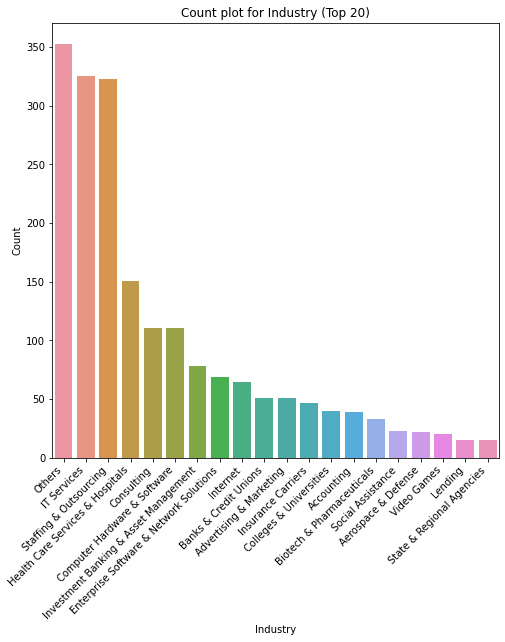

In [35]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Industry', data=df, order = df['Industry'].value_counts()[:20].index)
p = plt.title('Count plot for Industry (Top 20)')
p = plt.xlabel('Industry')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [36]:
# Cleaning 'Sector' column
df['Sector'].value_counts()

Information Technology                570
Business Services                     524
-1                                    353
Finance                               169
Health Care                           151
Education                              52
Insurance                              51
Accounting & Legal                     43
Media                                  42
Manufacturing                          40
Retail                                 38
Government                             36
Biotech & Pharmaceuticals              33
Non-Profit                             26
Aerospace & Defense                    22
Transportation & Logistics             20
Construction, Repair & Maintenance     16
Consumer Services                      14
Oil, Gas, Energy & Utilities           13
Real Estate                            12
Telecommunications                     11
Restaurants, Bars & Food Services       8
Arts, Entertainment & Recreation        7
Mining & Metals                   

In [37]:
df['Sector'] = df['Sector'].apply(lambda x: 'Others' if x=='-1' else x)

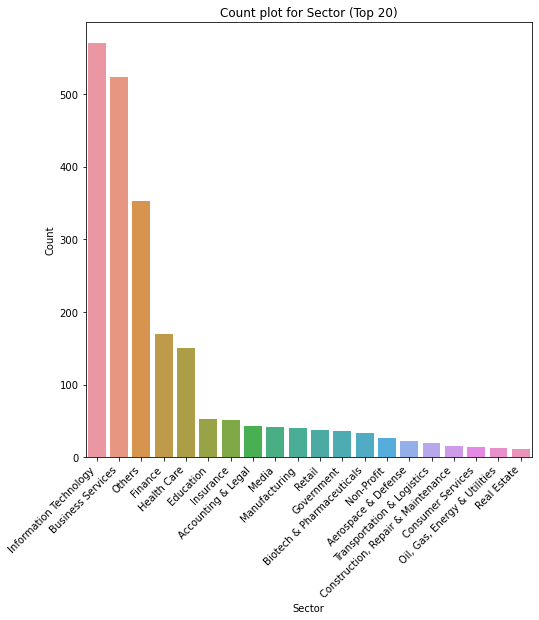

In [38]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts()[:20].index)
p = plt.title('Count plot for Sector (Top 20)')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [39]:
# Cleaning 'Revenue' column
def revenue_simplifier(text):
    if '-1' in text.lower():
        return 'Unknown / Non-Applicable'
    else:
        return text
df['Revenue'] = df['Revenue'].apply(revenue_simplifier)

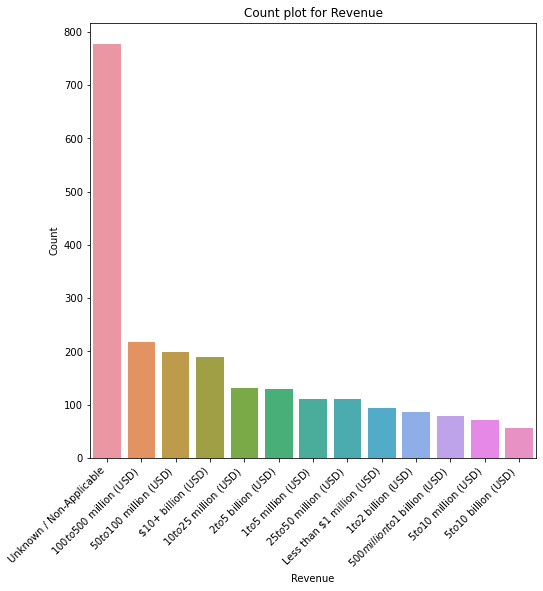

In [40]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Revenue', data=df, order = df['Revenue'].value_counts().index)
p = plt.title('Count plot for Revenue')
p = plt.xlabel('Revenue')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [41]:
# Cleaning 'Competitors' column
df['Competitors']

0                                                      -1
1                                                      -1
2                                                 GoDaddy
3                                                      -1
4                                              DraftKings
                              ...                        
2248                                                   -1
2249                       Avnet, Ingram Micro, Tech Data
2250                                                   -1
2251                                                   -1
2252    Centura Health, HealthONE, Denver Health and H...
Name: Competitors, Length: 2253, dtype: object

In [42]:
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

<ipython-input-43-405b8ea041fe>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


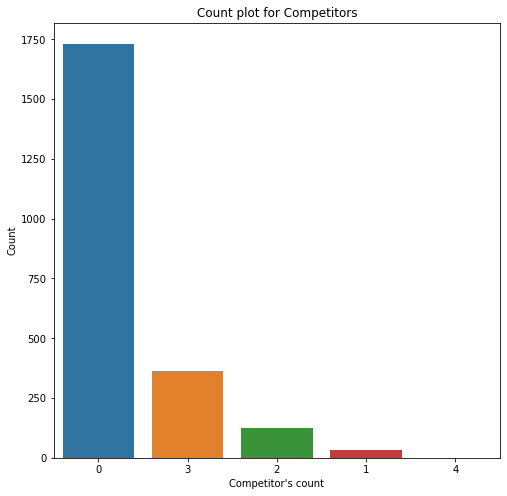

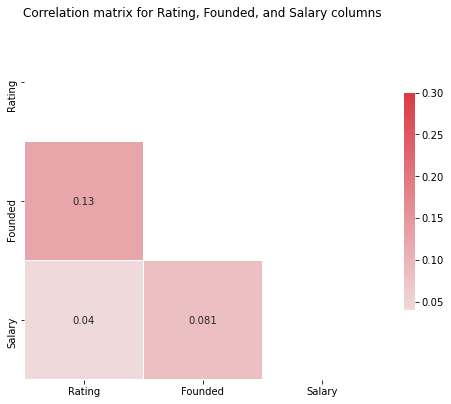

In [43]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Competitors', data=df, order = df['Competitors'].value_counts().index)
p = plt.title('Count plot for Competitors')
p = plt.xlabel("Competitor's count")
p = plt.ylabel('Count')# Finding and plotting the correlation between numerical features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(8,8))
corr = df[['Rating','Founded','Salary']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, annot=True, linewidths=0.05, cbar_kws={"shrink": .5})
p = plt.title('Correlation matrix for Rating, Founded, and Salary columns')

In [44]:
df['job_in_headquarters'] = df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)

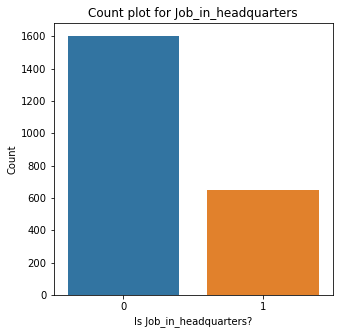

In [45]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='job_in_headquarters', data=df)
p = plt.title('Count plot for Job_in_headquarters')
p = plt.xlabel("Is Job_in_headquarters?")
p = plt.ylabel('Count')

In [46]:
df.drop(labels=['Location'], axis=1, inplace=True)

In [47]:
# Creating columns of 'python, excel, sql, tableau' jobs
df['python_job'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['excel_job'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['sql_job'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['tableau_job'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

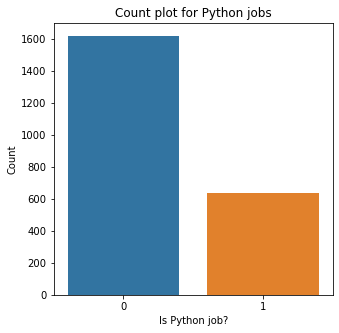

In [48]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='python_job', data=df)
p = plt.title('Count plot for Python jobs')
p = plt.xlabel("Is Python job?")
p = plt.ylabel('Count')

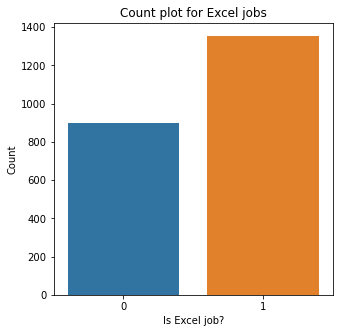

In [49]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='excel_job', data=df)
p = plt.title('Count plot for Excel jobs')
p = plt.xlabel("Is Excel job?")
p = plt.ylabel('Count')

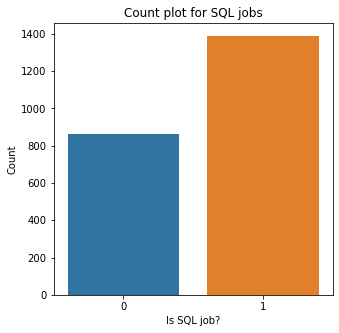

In [50]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='sql_job', data=df)
p = plt.title('Count plot for SQL jobs')
p = plt.xlabel("Is SQL job?")
p = plt.ylabel('Count')

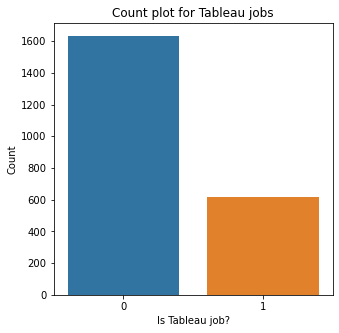

In [51]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='tableau_job', data=df)
p = plt.title('Count plot for Tableau jobs')
p = plt.xlabel("Is Tableau job?")
p = plt.ylabel('Count')

In [52]:
df.drop(labels=['Job Description'], axis=1, inplace=True)

In [53]:
# Trimming the 'Sector' column

# Taking top 9 Sector and replacing remaining by 'Others'
sector_list = list(df['Sector'].value_counts()[:10].index)

def sector_simplifier(text):
  if text not in sector_list:
    return 'Others'
  else:
    return text

df['Sector'] = df['Sector'].apply(sector_simplifier)

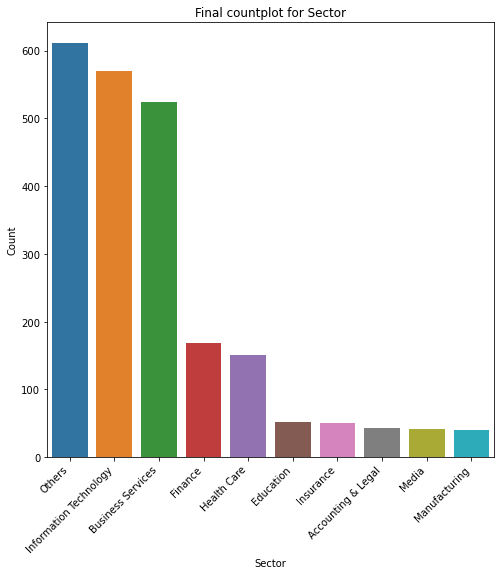

In [54]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts().index)
p = plt.title('Final countplot for Sector')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [55]:
# Trimming the 'job_location' column

# Taking top 9 States and replacing others by 'Others'
job_location_list = list(df['job_location'].value_counts()[:9].index)

def job_location_simplifier(text):
  if text not in job_location_list:
    return 'Others'
  else:
    return text

df['job_location'] = df['job_location'].apply(job_location_simplifier)

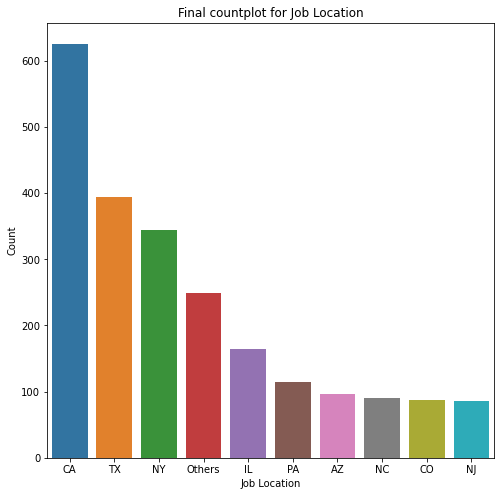

In [56]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_location', data=df, order = df['job_location'].value_counts().index)
p = plt.title('Final countplot for Job Location')
p = plt.xlabel('Job Location')
p = plt.ylabel('Count')

In [57]:
df.drop(labels=['Salary Estimate', 'Company Name', 'Headquarters', 'Industry', 'job_location'], axis=1, inplace=True)

In [58]:
# Renaming columns
df.rename(columns={'Rating':'company_rating', 'Size':'company_size', 'Founded':'company_founded', 'Type of ownership':'type_of_ownership',
                   'Sector':'sector', 'Revenue':'revenue', 'Competitors':'competitors', 'Salary': 'salary'}, inplace=True)# Mapping ranks to 'company_size' column
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df['company_size'] = df['company_size'].map(size_map)

In [59]:
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

df['revenue'] = df['revenue'].map(revenue_map)

In [60]:
# Mapping ranks to 'job_seniority	' column
job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}

df['job_seniority'] = df['job_seniority'].map(job_seniority_map)

In [61]:
# Removing 'type_of_ownership' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['type_of_ownership'], data=df, prefix='ownership')
print('After: {}'.format(df.shape))

Before: (2253, 16)
After: (2253, 25)


In [62]:
# Removing 'sector' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['sector'], data=df)
print('After: {}'.format(df.shape))

Before: (2253, 25)
After: (2253, 34)


In [63]:
# Removing 'job_title' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['job_title'], data=df)
print('After: {}'.format(df.shape))

Before: (2253, 34)
After: (2253, 39)


In [64]:
# Removing 'others' column to reduce dimentionality and avoid dummy variable trap
df.drop(labels=['ownership_Other Organization', 'sector_Others', 'job_title_other'], axis=1, inplace=True)

In [65]:
X = df[['company_rating', 'company_size', 'company_founded', 'revenue',
       'Easy Apply', 'job_seniority', 'job_in_headquarters',
       'python_job', 'excel_job', 'sql_job', 'tableau_job',
       'ownership_College / University', 'ownership_Franchise',
       'ownership_Government', 'ownership_Hospital',
       'ownership_Nonprofit Organization', 'ownership_Private',
       'ownership_Public', 'ownership_Self-employed',
       'ownership_Subsidiary or Business Segment', 'sector_Accounting & Legal',
       'sector_Business Services', 'sector_Education', 'sector_Finance',
       'sector_Health Care', 'sector_Information Technology',
       'sector_Insurance', 'sector_Manufacturing', 'sector_Media',
       'job_title_data analyst', 'job_title_data engineer',
       'job_title_data scientist', 'job_title_director', 'job_title_manager']]
y = df['salary']

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

<ipython-input-67-dfdc4c4dd63f>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


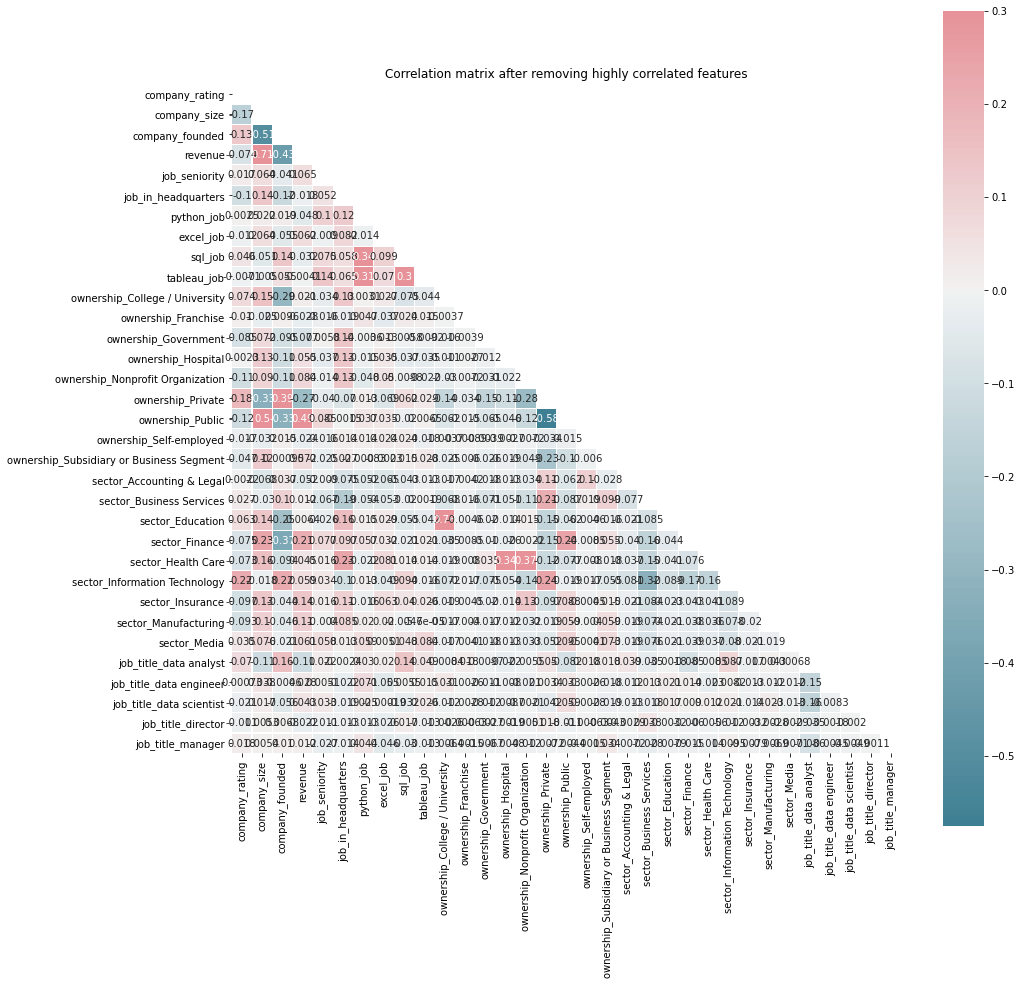

In [67]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix after removing highly correlated features')

In [68]:
# Rearranging the columns

X = X[['company_rating', 'company_founded',
       'sector_Health Care', 'sector_Business Services', 'sector_Information Technology',
       'ownership_Private', 'job_title_data scientist', 'job_title_data analyst', 'job_seniority', 'job_in_headquarters',
       'excel_job', 'python_job', 'tableau_job', 'sql_job',]]

In [69]:
from sklearn.preprocessing import StandardScaler
X_prev = X.copy()

sc_rating = StandardScaler()
X['company_rating'] = sc_rating.fit_transform(X[['company_rating']])

sc_founded = StandardScaler()
X['company_founded'] = sc_founded.fit_transform(X[['company_founded']])

/Users/sarthakdhaneshwar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sarthakdhaneshwar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


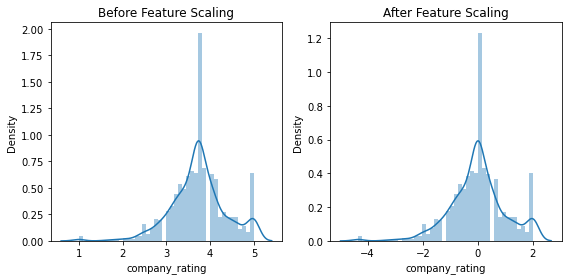

In [70]:
# Plotting company_rating before & after feature scaling
plt.figure(figsize=(8, 4))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=X_prev['company_rating'])
p = plt.title('Before Feature Scaling')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=X['company_rating'])
p = plt.title('After Feature Scaling')

plt.tight_layout()
plt.show()

In [71]:
from sklearn.model_selection import cross_val_score
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cv = cross_val_score(lr, X, y, cv=10, scoring = 'neg_root_mean_squared_error')
print('Average NRMSE: {} '.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))


Average NRMSE: -23.08 
Standard Deviation: 7.519


In [72]:
# Fitting Lasso Regression to the Training set
from sklearn.linear_model import Lasso
lasso = Lasso()
cv = cross_val_score(lasso, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('Average NRMSE: {} '.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

Average NRMSE: -22.742 
Standard Deviation: 7.76


In [73]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
cv = cross_val_score(rf, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('Average RMSE: {}'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

Average RMSE: -25.395
Standard Deviation: 6.297


In [74]:
# Fitting Gradient Boosting to the Training set
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
cv = cross_val_score(gb, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('Average NRMSE: {} '.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

Average NRMSE: -23.498 
Standard Deviation: 7.42


In [75]:
# Fitting Random Forest and Gradient Boosting to Voting Regressor
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('random_forest', rf), ('gradient_boosting', gb)], weights=[2,1])
cv = cross_val_score(vr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('Average NRMSE: {} '.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

Average NRMSE: -24.413 
Standard Deviation: 6.832


In [76]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [77]:
def predict_salary(rating, founded, sector, ownership, job_title, job_in_headquarters, job_seniority, job_skills):

  prediction_input = list()

  prediction_input.append(sc_rating.transform(np.array(rating).reshape(1, -1)))
  prediction_input.append(sc_founded.transform(np.array(founded).reshape(1, -1)))  

  sector_columns = ['sector_Health Care','sector_Business Services','sector_Information Technology']
  temp = list(map(int, np.zeros(shape=(1, len(sector_columns)))[0]))
  for index in range(0, len(sector_columns)):
    if sector_columns[index] == 'sector_' + sector:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  if ownership == 'Private':
    prediction_input.append(1)
  else:
    prediction_input.append(0)
  

  job_title_columns = ['job_title_data scientist', 'job_title_data analyst']
  temp = list(map(int, np.zeros(shape=(1, len(job_title_columns)))[0]))
  for index in range(0, len(job_title_columns)):
    if job_title_columns[index] == 'job_title_' + job_title:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  prediction_input.append(job_in_headquarters)


  job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}
  prediction_input.append(job_seniority_map[job_seniority])


  temp = list(map(int, np.zeros(shape=(1, 4))[0]))
  if 'excel' in job_skills:
    temp[0] = 1
  if 'python' in job_skills:
    temp[1] = 1
  if 'tableau' in job_skills:
    temp[2] = 1
  if 'sql' in job_skills:
    temp[3] = 1
    
  prediction_input = prediction_input + temp


  return rf.predict([prediction_input])[0]

In [87]:
salary = predict_salary(5.0 ,2012, 'Health Care', 'Private', 'data analyst', 1, 'sr', ['python','sql' 'tableau','excel','r'])
print('Estimated salary : {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary : 81883(USD) to 99883(USD) per annum.


In [80]:
salary = predict_salary(5.0, 2000, 'Media', 'Private', 'data scientist', 1, 'sr', ['python', 'tableau','excel'])
print('Estimated salary: {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary: 81022(USD) to 99022(USD) per annum.
